#### Import libraries

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Population Data Processing

#### Import population data and fill NaN values with mean

In [194]:
dataset_population = pd.read_csv('dataset_population.csv')
dataset_population = dataset_population.apply(lambda x: x.fillna(pd.np.mean(x.iloc[1:])), axis=1)
dataset_population.head()

,District,1871,1881,1891,1901,1911,1921,1931,1946,1953,1963,1971,1981,2001,2012
0,Colombo,430.000000,506.500000,578.900000,690.800000,826.800000,923.100000,1081.200000,1420.300000,1708.700000,2207.400000,2672.300000,1699.2,2251.3,2309.81
1,Gampaha,1916.413333,1916.413333,1916.413333,1916.413333,1916.413333,1916.413333,1916.413333,1916.413333,1916.413333,1916.413333,1916.413333,1390.9,2063.7,2294.64
2,Kalutara,145.700000,165.000000,183.600000,229.900000,279.500000,323.700000,363.800000,456.600000,523.600000,631.500000,729.500000,829.7,1066.2,1217.26
3,Kandy,232.200000,288.300000,288.400000,377.600000,408.400000,434.000000,587.700000,711.400000,840.400000,1043.600000,1188.000000,1048.3,1279.0,1369.90
4,Matale,75.200000,86.700000,76.600000,92.200000,108.400000,116.600000,129.700000,155.700000,201.000000,255.600000,314.400000,357.4,441.3,482.23


#### Transposing dataset

In [195]:
dataset_population = dataset_population.set_index('District').T.rename_axis('Year').rename_axis(None, 1).reset_index().set_index('Year')
dataset_population.rename(columns={'Nuwara - Eliya':'Nuwara Eliya',
                          'Kurunagala':'Kurunegala',
                          'Monaragala':'Moneragala',
                          'Polannaruwa': 'Polonnaruwa'}, 
                 inplace=True)

dataset_population.head()

,Colombo,Gampaha,Kalutara,Kandy,Matale,Nuwara Eliya,Galle,Matara,Hambantota,Jaffna,...,Trincomalee,Kurunegala,Puttalam,Chilaw,Anuradhapura,Polonnaruwa,Badulla,Moneragala,Ratnapura,Kegalle
Year,,,,,,,,,,,,,,,,,,,,,
1871,430.0,1916.413333,145.7,232.2,75.2,58.2,194.4,143.3,60.9,246.1,...,19.4,207.1,68.1,107.442857,63.7,260.308,129.0,288.868,92.2,105.3
1881,506.5,1916.413333,165.0,288.3,86.7,98.7,209.7,151.9,71.9,265.6,...,22.2,215.2,78.2,107.442857,66.1,260.308,165.7,288.868,105.9,120.0
1891,578.9,1916.413333,183.6,288.4,76.6,109.6,222.9,177.6,89.3,279.3,...,25.7,230.2,26.7,63.200000,75.3,260.308,159.2,288.868,108.0,150.6
1901,690.8,1916.413333,229.9,377.6,92.2,153.0,258.1,203.8,104.9,300.9,...,28.4,249.4,29.8,74.400000,79.1,260.308,186.7,288.868,133.0,188.8
1911,826.8,1916.413333,279.5,408.4,108.4,155.5,291.0,227.3,110.5,326.7,...,29.8,306.8,39.7,87.600000,86.3,260.308,216.7,288.868,166.0,242.5


In [196]:
dataset_population.describe()

,Colombo,Gampaha,Kalutara,Kandy,Matale,Nuwara Eliya,Galle,Matara,Hambantota,Jaffna,...,Trincomalee,Kurunegala,Puttalam,Chilaw,Anuradhapura,Polonnaruwa,Badulla,Moneragala,Ratnapura,Kegalle
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1379.022143,1916.413333,510.397143,721.228571,206.645000,316.656429,505.533571,393.345714,227.472857,445.705714,...,118.420000,659.464286,218.427143,107.442857,270.830714,260.308000,400.247143,288.868000,424.255714,414.592857
std,763.403956,184.164023,342.356639,402.410597,140.254381,223.568633,296.003048,230.777781,177.296335,180.072751,...,124.378354,487.849413,264.863863,25.559218,271.183669,68.482643,238.728145,73.962263,343.881978,254.301204
min,430.000000,1390.900000,145.700000,232.200000,75.200000,58.200000,194.400000,143.300000,60.900000,246.100000,...,19.400000,207.100000,26.700000,63.200000,63.700000,113.900000,129.000000,132.200000,92.200000,105.300000
25%,724.800000,1916.413333,242.300000,385.300000,96.250000,153.625000,266.325000,209.675000,106.300000,307.350000,...,28.750000,263.750000,36.625000,103.660714,80.900000,260.308000,194.200000,288.868000,141.250000,202.225000
50%,1250.750000,1916.413333,410.200000,649.550000,142.700000,251.950000,411.700000,317.600000,137.050000,390.100000,...,56.700000,441.100000,63.450000,107.442857,118.450000,260.308000,337.700000,288.868000,303.700000,358.200000
75%,2082.725000,1916.413333,705.000000,1047.125000,299.700000,437.150000,711.775000,568.525000,323.800000,560.485000,...,175.775000,982.350000,359.425000,107.442857,361.550000,260.308000,592.000000,288.868000,632.475000,635.725000
max,2672.300000,2294.640000,1217.260000,1369.900000,482.230000,706.590000,1058.770000,809.340000,596.620000,830.600000,...,378.180000,1610.300000,759.780000,170.100000,856.230000,403.340000,811.760000,448.140000,1082.280000,836.600000


#### Import area dataset

In [197]:
dataset_area = pd.read_csv('dataset_land_area.csv', usecols = [' / District','Land '])
dataset_area = dataset_area.set_index(' / District').T.rename_axis('Land').rename_axis(None, 1).reset_index().drop('Land', axis=1)

# dataset_population.rename(columns={'Uva Province ':'Uva Province'}, inplace=True)
dataset_area.head()

,Sri Lanka,Western Province,Colombo,Gampaha,Kalutara,Central Province,Kandy,Matale,Nuwara Eliya,Southern Province,...,Uva Province,Badulla,Moneragala,Sabaragamuwa Province,Ratnapura,Kegalle,nan,nan,nan,nan
0,62705.0,3593.0,675.7,1340.6,1575.6,5575.0,1916.5,1952.3,1706.2,5383.0,...,8335.0,2827.3,5507.7,4921.2,3236.4,1684.8,NaN,NaN,NaN,NaN


#### Obtaining district column intersection

There were some missing districts in the data set (ex: Chillaw)

In [198]:
population_cols = dataset_population.columns[0:].values
area_cols = dataset_area.columns.values

def intersection(array1, arra2): 
    array = [value for value in array1 if value in arra2] 
    return array

district_cols = intersection(population_cols, area_cols)

### Population Density calculation for districts

Assumption: Land area of the districts remained same dutin the period

In [203]:
district_pop_density = pd.DataFrame([])

for column in district_cols:
    district_pop_density[column] = dataset_population[column].divide(dataset_area[column].values[0])
    
district_pop_density.head()

,Colombo,Gampaha,Kalutara,Kandy,Matale,Nuwara Eliya,Galle,Matara,Hambantota,Jaffna,...,Ampara,Trincomalee,Kurunegala,Puttalam,Anuradhapura,Polonnaruwa,Badulla,Moneragala,Ratnapura,Kegalle
Year,,,,,,,,,,,,,,,,,,,,,
1871,0.636377,1.429519,0.092473,0.121158,0.038519,0.034111,0.120252,0.112879,0.024396,0.264823,...,0.100157,0.007672,0.044790,0.023626,0.009558,0.084592,0.045627,0.052448,0.028488,0.062500
1881,0.749593,1.429519,0.104722,0.150430,0.044409,0.057848,0.129717,0.119653,0.028803,0.285807,...,0.100157,0.008779,0.046542,0.027130,0.009919,0.084592,0.058607,0.052448,0.032722,0.071225
1891,0.856741,1.429519,0.116527,0.150483,0.039236,0.064236,0.137882,0.139898,0.035773,0.300549,...,0.100157,0.010163,0.049786,0.009263,0.011299,0.084592,0.056308,0.052448,0.033370,0.089387
1901,1.022347,1.429519,0.145913,0.197026,0.047226,0.089673,0.159656,0.160536,0.042022,0.323792,...,0.100157,0.011231,0.053938,0.010339,0.011869,0.084592,0.066035,0.052448,0.041095,0.112061
1911,1.223620,1.429519,0.177393,0.213097,0.055524,0.091138,0.180007,0.179047,0.044266,0.351555,...,0.100157,0.011784,0.066352,0.013773,0.012950,0.084592,0.076646,0.052448,0.051292,0.143934


### Population Density Calculation for provinces  + Colombo District

In [204]:
provincial_data = {'Western Province': ['Colombo', 'Gampaha', 'Kalutara'], 
                   'Central Province': ['Kandy', 'Matale', 'Nuwara Eliya'],
                   'Southern Province': ['Galle', 'Matara', 'Hambantota'],
                   'Northern Province': ['Jaffna', 'Kilinochchi', 'Mannar','Vavuniya', 'Mullaitivu'],
                   'Eastern Province': ['Batticaloa', 'Ampara', 'Trincomalee'],
                   'North-Western Province ': ['Kurunegala', 'Puttalam', 'Chilaw'],
                   'North Central Province': ['Anuradhapura', 'Polonnaruwa'],
                   'Uva Province': ['Badulla', 'Moneragala'],
                   'Sabaragamuwa Province': ['Ratnapura', 'Kegalle']
                  }

provincial_population = pd.DataFrame([])

for province, districts in provincial_data.items():
    provincial_population[province] = dataset_population[districts[0]]
    for x in range (1, len(districts)):
        provincial_population[province] = provincial_population[province] + dataset_population[districts[x]]

provincial_population.head()

,Western Province,Central Province,Southern Province,Northern Province,Eastern Province,North-Western Province,North Central Province,Uva Province,Sabaragamuwa Province
Year,,,,,,,,,
1871,2492.113333,365.6,398.6,498.74,535.352,382.642857,324.008,417.868,197.5
1881,2587.913333,473.7,433.5,519.54,550.452,400.842857,326.408,454.568,225.9
1891,2678.913333,474.6,489.8,536.34,571.252,320.100000,335.608,448.068,258.6
1901,2837.113333,622.8,566.8,558.04,596.452,353.600000,339.408,475.568,321.8
1911,3022.713333,672.3,628.8,586.64,606.552,434.100000,346.608,505.568,408.5


##### Since property value data set compares provincial data and colombo district's change, we will add colombo district column to the data set

In [205]:
provincial_pop_density = pd.DataFrame([])

provincial_pop_density['Colombo'] = district_pop_density['Colombo'].multiply(1000)

for province in provincial_data:
    provincial_pop_density[province] = provincial_population[province].divide(dataset_area[province].values[0]).multiply(1000)
    
provincial_pop_density.head()

,Colombo,Western Province,Central Province,Southern Province,Northern Province,Eastern Province,North-Western Province,North Central Province,Uva Province,Sabaragamuwa Province
Year,,,,,,,,,,
1871,636.377090,693.602375,65.578475,74.047929,60.161641,57.189616,50.978265,33.262293,50.134133,40.132488
1881,749.593015,720.265331,84.968610,80.531302,62.670688,58.802692,53.402992,33.508675,54.537253,45.903438
1891,856.741157,745.592356,85.130045,90.990154,64.697226,61.024677,42.645883,34.453136,53.757409,52.548159
1901,1022.347196,789.622414,111.713004,105.294445,67.314837,63.716697,47.108979,34.843240,57.056749,65.390555
1911,1223.619950,841.278412,120.591928,116.812187,70.764777,64.795641,57.833733,35.582384,60.656029,83.008209


## [TODO] Population Data Visualization

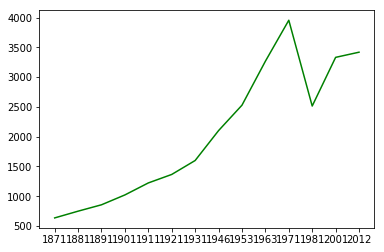

In [208]:
plt.plot(provincial_pop_density.index.values, provincial_pop_density['Colombo'].values, color='g')

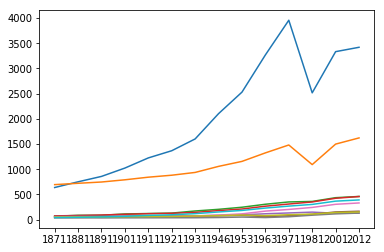

In [209]:
plt.plot(provincial_pop_density)

## Residencial Land Prices Data Processing